# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 140)
from skimpy import clean_columns

# Ingest Data  

In [2]:
df0 = pd.read_excel("World military power.xlsx", header = [0,1])
df = df0.copy()
df.head()

2020 ranking                               Airforce Strength  \
  Military Strength Military Strength Power Index Aircraft Strength   
0       Afghanistan                        1.3444       Afghanistan   
1           Albania                        2.3137           Albania   
2           Algeria                        0.4659           Algeria   
3            Angola                        0.8379            Angola   
4         Argentina                        0.6521         Argentina   

                                                        \
  Aircraft Strength value Fighter/Interceptor Strength   
0                   260.0                  Afghanistan   
1                    19.0                      Albania   
2                   551.0                      Algeria   
3                   295.0                       Angola   
4                   227.0                    Argentina   

                                                               \
  Fighter/Interceptor Strength value Attack Aircraft Strength   
0                                0.0              Afghanistan   
1                                0.0                  Albania   
2                              103.0                  Algeria   
3                               72.0                   Angola   
4                               24.0                Argentina   

                                                                    \
  Attack Aircraft Strength value Transport Aircraft Fleet Strength   
0                           25.0                       Afghanistan   
1                            0.0                           Albania   
2                           22.0                           Algeria   
3                           18.0                            Angola   
4                            7.0                         Argentina   

                                                                  \
  Transport Aircraft Fleet Strength value Trainer Aircraft Fleet   
0                                    30.0            Afghanistan   
1                                     0.0                Albania   
2                                    59.0                Algeria   
3                                    30.0                 Angola   
4                                     9.0              Argentina   

                                                          \
  Trainer Aircraft Fleet value Helicopter Fleet Strength   
0                          0.0               Afghanistan   
1                          0.0                   Albania   
2                         87.0                   Algeria   
3                         47.0                    Angola   
4                         64.0                 Argentina   

                                                                    \
  Helicopter Fleet Strength value Attack Helicopter Fleet Strength   
0                           187.0                      Afghanistan   
1                            19.0                          Albania   
2                           257.0                          Algeria   
3                           126.0                           Angola   
4                           100.0                        Argentina   

                                         Land Strength                      \
  Attack Helicopter Fleet Strength value Tank Strength Tank Strength value   
0                                    0.0   Afghanistan                 0.0   
1                                    0.0       Albania                 0.0   
2                                   45.0       Algeria               880.0   
3                                   15.0        Angola               379.0   
4                                    0.0     Argentina               370.0   

                                                                             \
  AFV/APC Strength AFV/APC Strength value Self-Propelled Artillery Strength   
0      Afghanistan                 1062.0                    

# EDA

In [3]:
df

2020 ranking                                \
                    Military Strength Military Strength Power Index   
0                         Afghanistan                        1.3444   
1                             Albania                        2.3137   
2                             Algeria                        0.4659   
3                              Angola                        0.8379   
4                           Argentina                        0.6521   
5                             Armenia                        2.1251   
6                           Australia                        0.3225   
7                             Austria                        0.9568   
8                          Azerbaijan                        0.9463   
9                             Bahrain                        1.8547   
10                         Bangladesh                        0.7066   
11                            Belarus                        0.8179   
12                            Belgium                        1.0499   
13                             Bhutan                       10.1681   
14                            Bolivia                        0.9942   
15             Bosnia and Herzegovina                        3.8586   
16                           Botswana                        2.0582   
17                             Brazil                        0.1988   
18                           Bulgaria                        0.8916   
19                       Burkina Faso                        1.9009   
20                           Cambodia                        2.0557   
21                           Cameroon                        1.9902   
22                             Canada                        0.3712   
23           Central African Republic                        3.2889   
24                               Chad                        1.6383   
25                              Chile                        0.7668   
26                              China                        0.0691   
27                           Colombia                        0.6045   
28                            Croatia                        1.0183   
29                               Cuba                        1.2208   
30                            Czechia                        0.5531   
31   Democratic Republic of the Congo                        1.1389   
32                            Denmark                        0.7878   
33                 Dominican Republic                        2.7504   
34                            Ecuador                        1.0062   
35                              Egypt                        0.1872   
36                        El Salvador                        3.1291   
37                            Estonia                        2.5893   
38                           Ethiopia                        0.8581   
39                            Finland                        0.8498   
40                             France                        0.1702   
41                              Gabon                        3.3736   
42                            Georgia                        1.6679   
43                            Germany                        0.2186   
44                              Ghana                        2.0554   
45                             Greece                        0.5311   
46                          Guatemala                        1.8302   
47                           Honduras                        2.0943   
48                            Hungary                        0.8215   
49                              India                        0.0953   
50                          Indonesia                        0.2544   
51                               Iran                        0.2191   
52                               Iraq                        0.7911   
53                            Ireland                        1.9481   
54                             Israel            

In [4]:
df.describe().T

count         mean  \
2020 ranking      Military Strength Power Index            138.0     1.460716   
Airforce Strength Aircraft Strength value                  138.0   388.471014   
                  Fighter/Interceptor Strength value       138.0    81.565217   
                  Attack Aircraft Strength value           138.0    25.760870   
                  Transport Aircraft Fleet Strength value  138.0    30.231884   
                  Trainer Aircraft Fleet value             138.0    82.833333   
                  Helicopter Fleet Strength value          138.0   154.065217   
                  Attack Helicopter Fleet Strength value   138.0    25.623188   
Land Strength     Tank Strength value                      138.0   646.565217   
                  AFV/APC Strength value                   138.0  2485.695652   
                  Self-Propelled Artillery Strength value  138.0   212.159420   
                  Towed Artillery Strength value           138.0   393.978261   
                  Rocket Projector Strength value          138.0   156.934783   
Navy Strength     Navy Fleet Strengths value               124.0    84.983871   
                  Aircraft Carrier Fleet Strength value    115.0     0.382609   
                  Submarine Fleet Strength value           115.0     4.800000   
                  Destroyer Fleet Strength value           115.0     2.052174   
                  Frigate Fleet Strength value             115.0     3.521739   
Logistics         Airport Totals value                     138.0   290.043478   
Geography         Total Border Coverage value              129.0  3964.224806   

                                                                   std  \
2020 ranking      Military Strength Power Index               1.324018   
Airforce Strength Aircraft Strength value                  1231.981859   
                  Fighter/Interceptor Strength value        230.324777   
                  Attack Aircraft Strength value             94.528222   
                  Transport Aircraft Fleet Strength value    92.330436   
                  Trainer Aircraft Fleet value              240.803721   
                  Helicopter Fleet Strength value           520.183631   
                  Attack Helicopter Fleet Strength value     97.326091   
Land Strength     Tank Strength value                      1515.463683   
                  AFV/APC Strength value                   5410.546392   
                  Self-Propelled Artillery Strength value   688.028987   
                  Towed Artillery Strength value            805.781703   
                  Rocket Projector Strength value           484.380984   
Navy Strength     Navy Fleet Strengths value                146.114165   
                  Aircraft Carrier Fleet Strength value       1.971653   
                  Submarine Fleet Strength value             13.706958   
                  Destroyer Fleet Strength value             10.000740   
                  Frigate Fleet Strength value                6.481211   
Logistics         Airport Totals value                     1212.967393   
Geography         Total Border Coverage value              3760.099671   

                                                               min        25%  \
2020 ranking      Military Strength Power Index             0.0606     0.5748   
Airforce Strength Aircraft Strength value                   0.0000    33.0000   
                  Fighter/Interceptor Strength value        0.0000     0.0000   
                  Attack Aircraft Strength value            0.0000     0.0000   
                  Transport Aircraft Fleet Strength value   0.0000     3.0000   
                  Trainer Aircraft Fleet value              0.0000     4.2500   
                  Helicopter Fleet Strength value           0.0000    15.2500   
                  Attack Helicopter Fleet Strength value    0.0000     0.0000   
Land Strength     Tank Strength value                       0.0000    19.

In [5]:
df.shape

(138, 60)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, Military Strength)                             138 non-null    object 
 1   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 2   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 3   (Airforce Strength, Aircraft Strength value)                  138 non-null    float64
 4   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 5   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    float64
 6   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 7   (Airforce Strength, Attack Aircraft Strength value)           138 non-n

## Implement basic steps to see how is your data looks like

In [7]:
df.describe(include=object).T

count unique  \
2020 ranking      Military Strength                    138    138   
Airforce Strength Aircraft Strength                    138    138   
                  Fighter/Interceptor Strength         138    138   
                  Attack Aircraft Strength             138    138   
                  Transport Aircraft Fleet Strength    138    138   
                  Trainer Aircraft Fleet               138    138   
                  Helicopter Fleet Strength            138    138   
                  Attack Helicopter Fleet Strength     138    138   
Land Strength     Tank Strength                        138    138   
                  AFV/APC Strength                     138    138   
                  Self-Propelled Artillery Strength    138    138   
                  Towed Artillery Strength             138    138   
                  Rocket Projector Strength            138    138   
Navy Strength     Navy Fleet Strengths                 124    124   
                  Aircraft Carrier Fleet Strength      115    115   
                  Submarine Fleet Strength             115    115   
                  Destroyer Fleet Strength             115    115   
                  Frigate Fleet Strength               115    115   
Finances          defense spending budget              138    138   
                  defense spending budget value        138    124   
                  External Debt                        138    138   
                  External Debt value                  138    138   
Logistics         Airport Totals                       138    138   
Natural resources Oil Production                       138    138   
                  Oil Production value               138.0   88.0   
                  Oil Consumption                      138    138   
                  Oil Consumption value              138.0  102.0   
                  Proven Oil Reserves                  138    138   
                  Proven Oil Reserves value          138.0   84.0   
Manpower          Available Manpower                   138    138   
                  Available Manpower value             138    138   
                  Total Population                     138    138   
                  Total Population value               138    138   
Geography         Total Square Land Area               138    138   
                  Total Square Land Area value         138    138   
                  Total Coastline Coverage             109    109   
                  Total Coastline Coverage value     109.0  104.0   
                  Total Waterway Coverage              138    138   
                  Total Waterway Coverage value      138.0   92.0   
                  Total Border Coverage                129    129   

                                                                top  freq  
2020 ranking      Military Strength                     Afghanistan     1  
Airforce Strength Aircraft Strength                     Afghanistan     1  
                  Fighter/Interceptor Strength          Afghanistan     1  
                  Attack Aircraft Strength              Afghanistan     1  
                  Transport Aircraft Fleet Strength     Afghanistan     1  
                  Trainer Aircraft Fleet                Afghanistan     1  
                  Helicopter Fleet Strength             Afghanistan     1  
                  Attack Helicopter Fleet Strength      Afghanistan     1  
Land Strength     Tank Strength                         Afghanistan     1  
                  AFV/APC Strength                      Afghanistan     1  
                  Self-Propelled Artillery Strength     Afghanistan     1  
                  Towed Artillery Strength              Afghanistan     1  
                  Rocket Projector Strength             Afghanistan     1  
Navy Strength     Navy Fleet Strengths                  Afghanistan     1  
                  Aircraft Carrier Fleet Strength       Afghanistan     1  
       

In [8]:
df.nunique()

2020 ranking       Military Strength                          138
                   Military Strength Power Index              138
Airforce Strength  Aircraft Strength                          138
                   Aircraft Strength value                    113
                   Fighter/Interceptor Strength               138
                   Fighter/Interceptor Strength value          63
                   Attack Aircraft Strength                   138
                   Attack Aircraft Strength value              38
                   Transport Aircraft Fleet Strength          138
                   Transport Aircraft Fleet Strength value     49
                   Trainer Aircraft Fleet                     138
                   Trainer Aircraft Fleet value                77
                   Helicopter Fleet Strength                  138
                   Helicopter Fleet Strength value             97
                   Attack Helicopter Fleet Strength           138
          

In [9]:
df.duplicated().value_counts()

False    138
dtype: int64

In [10]:
df.columns

MultiIndex([(     '2020 ranking',                       'Military Strength'),
            (     '2020 ranking',           'Military Strength Power Index'),
            ('Airforce Strength',                       'Aircraft Strength'),
            ('Airforce Strength',                 'Aircraft Strength value'),
            ('Airforce Strength',            'Fighter/Interceptor Strength'),
            ('Airforce Strength',      'Fighter/Interceptor Strength value'),
            ('Airforce Strength',                'Attack Aircraft Strength'),
            ('Airforce Strength',          'Attack Aircraft Strength value'),
            ('Airforce Strength',       'Transport Aircraft Fleet Strength'),
            ('Airforce Strength', 'Transport Aircraft Fleet Strength value'),
            ('Airforce Strength',                  'Trainer Aircraft Fleet'),
            ('Airforce Strength',            'Trainer Aircraft Fleet value'),
            ('Airforce Strength',               'Helicopter Flee

In [11]:
df.sample(5)

2020 ranking                               Airforce Strength  \
    Military Strength Military Strength Power Index Aircraft Strength   
75           Mongolia                        2.0299          Mongolia   
133         Venezuela                        0.6449         Venezuela   
0         Afghanistan                        1.3444       Afghanistan   
29               Cuba                        1.2208              Cuba   
46          Guatemala                        1.8302         Guatemala   

                                                          \
    Aircraft Strength value Fighter/Interceptor Strength   
75                      9.0                     Mongolia   
133                   260.0                    Venezuela   
0                     260.0                  Afghanistan   
29                     80.0                         Cuba   
46                     33.0                    Guatemala   

                                                                 \
    Fighter/Interceptor Strength value Attack Aircraft Strength   
75                                 0.0                 Mongolia   
133                               38.0                Venezuela   
0                                  0.0              Afghanistan   
29                                38.0                     Cuba   
46                                 0.0                Guatemala   

                                                                      \
    Attack Aircraft Strength value Transport Aircraft Fleet Strength   
75                             0.0                          Mongolia   
133                            0.0                         Venezuela   
0                             25.0                       Afghanistan   
29                             0.0                              Cuba   
46                             4.0                         Guatemala   

                                                                    \
    Transport Aircraft Fleet Strength value Trainer Aircraft Fleet   
75                                      3.0               Mongolia   
133                                    52.0              Venezuela   
0                                      30.0            Afghanistan   
29                                      2.0                   Cuba   
46                                      8.0              Guatemala   

                                                            \
    Trainer Aircraft Fleet value Helicopter Fleet Strength   
75                           0.0                  Mongolia   
133                         82.0                 Venezuela   
0                            0.0               Afghanistan   
29                          26.0                      Cuba   
46                           6.0                 Guatemala   

                                                                      \
    Helicopter Fleet Strength value Attack Helicopter Fleet Strength   
75                              6.0                         Mongolia   
133                            86.0                        Venezuela   
0                             187.0                      Afghanistan   
29                             14.0                             Cuba   
46                             15.0                        Guatemala   

                                           Land Strength                      \
    Attack Helicopter Fleet Strength value Tank Strength Tank Strength value   
75                                     0.0      Mongolia               470.0   
133                                   10.0     Venezuela               390.0   
0                                      0.0   Afghanistan                 0.0   
29                                     4.0          Cuba              1180.0   
46                                     0.0     Guatemala                12.0   

                                                                               \
    AFV/APC Strength AFV/APC

## Convert multi index columns to one level

In [12]:
df.columns = df.columns.map('_'.join).str.strip('_')

In [13]:
df.columns

Index(['2020 ranking_Military Strength',
       '2020 ranking_Military Strength Power Index',
       'Airforce Strength_Aircraft Strength',
       'Airforce Strength_Aircraft Strength value',
       'Airforce Strength_Fighter/Interceptor Strength',
       'Airforce Strength_Fighter/Interceptor Strength value',
       'Airforce Strength_Attack Aircraft Strength',
       'Airforce Strength_Attack Aircraft Strength value',
       'Airforce Strength_Transport Aircraft Fleet Strength',
       'Airforce Strength_Transport Aircraft Fleet Strength value',
       'Airforce Strength_Trainer Aircraft Fleet',
       'Airforce Strength_Trainer Aircraft Fleet value',
       'Airforce Strength_Helicopter Fleet Strength',
       'Airforce Strength_Helicopter Fleet Strength value',
       'Airforce Strength_Attack Helicopter Fleet Strength',
       'Airforce Strength_Attack Helicopter Fleet Strength value',
       'Land Strength_Tank Strength', 'Land Strength_Tank Strength value',
       'Land Strength

In [14]:
df=clean_columns(df)

In [15]:
df.rename(columns={'2020_ranking_military_strength': 'country'}, inplace=True)

In [16]:
df.columns

Index(['country', '2020_ranking_military_strength_power_index',
       'airforce_strength_aircraft_strength',
       'airforce_strength_aircraft_strength_value',
       'airforce_strength_fighter_interceptor_strength',
       'airforce_strength_fighter_interceptor_strength_value',
       'airforce_strength_attack_aircraft_strength',
       'airforce_strength_attack_aircraft_strength_value',
       'airforce_strength_transport_aircraft_fleet_strength',
       'airforce_strength_transport_aircraft_fleet_strength_value',
       'airforce_strength_trainer_aircraft_fleet',
       'airforce_strength_trainer_aircraft_fleet_value',
       'airforce_strength_helicopter_fleet_strength',
       'airforce_strength_helicopter_fleet_strength_value',
       'airforce_strength_attack_helicopter_fleet_strength',
       'airforce_strength_attack_helicopter_fleet_strength_value',
       'land_strength_tank_strength', 'land_strength_tank_strength_value',
       'land_strength_afv_apc_strength',
       'la

## Detect and drop duplicated columns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   country                                                    138 non-null    object 
 1   2020_ranking_military_strength_power_index                 138 non-null    float64
 2   airforce_strength_aircraft_strength                        138 non-null    object 
 3   airforce_strength_aircraft_strength_value                  138 non-null    float64
 4   airforce_strength_fighter_interceptor_strength             138 non-null    object 
 5   airforce_strength_fighter_interceptor_strength_value       138 non-null    float64
 6   airforce_strength_attack_aircraft_strength                 138 non-null    object 
 7   airforce_strength_attack_aircraft_strength_value           138 non-null    float64
 8   airforce_s

In [18]:
drop_list = df.iloc[:, [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58]]
drop_list

,airforce_strength_aircraft_strength,airforce_strength_fighter_interceptor_strength,airforce_strength_attack_aircraft_strength,airforce_strength_transport_aircraft_fleet_strength,airforce_strength_trainer_aircraft_fleet,airforce_strength_helicopter_fleet_strength,airforce_strength_attack_helicopter_fleet_strength,land_strength_tank_strength,land_strength_afv_apc_strength,land_strength_self_propelled_artillery_strength,land_strength_towed_artillery_strength,land_strength_rocket_projector_strength,navy_strength_navy_fleet_strengths,navy_strength_aircraft_carrier_fleet_strength,navy_strength_submarine_fleet_strength,navy_strength_destroyer_fleet_strength,navy_strength_frigate_fleet_strength,finances_defense_spending_budget,finances_external_debt,logistics_airport_totals,natural_resources_oil_production,natural_resources_oil_consumption,natural_resources_proven_oil_reserves,manpower_available_manpower,manpower_total_population,geography_total_square_land_area,geography_total_coastline_coverage,geography_total_waterway_coverage,geography_total_border_coverage
0,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
1,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania
2,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria
3,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola
4,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina
5,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,NaN,NaN,NaN,NaN,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,NaN,Armenia,Armenia
6,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,NaN
7,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,NaN,NaN,NaN,NaN,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,NaN,Austria,Austria
8,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan
9,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,Bahrain,NaN


In [19]:
df.drop(drop_list, axis = 1, inplace = True)

In [20]:
# df = df.T.drop_duplicates().T

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   country                                                    138 non-null    object 
 1   2020_ranking_military_strength_power_index                 138 non-null    float64
 2   airforce_strength_aircraft_strength_value                  138 non-null    float64
 3   airforce_strength_fighter_interceptor_strength_value       138 non-null    float64
 4   airforce_strength_attack_aircraft_strength_value           138 non-null    float64
 5   airforce_strength_transport_aircraft_fleet_strength_value  138 non-null    float64
 6   airforce_strength_trainer_aircraft_fleet_value             138 non-null    float64
 7   airforce_strength_helicopter_fleet_strength_value          138 non-null    float64
 8   airforce_s

## Check for missing values 

In [22]:
df.isnull().sum()

country                                                       0
2020_ranking_military_strength_power_index                    0
airforce_strength_aircraft_strength_value                     0
airforce_strength_fighter_interceptor_strength_value          0
airforce_strength_attack_aircraft_strength_value              0
airforce_strength_transport_aircraft_fleet_strength_value     0
airforce_strength_trainer_aircraft_fleet_value                0
airforce_strength_helicopter_fleet_strength_value             0
airforce_strength_attack_helicopter_fleet_strength_value      0
land_strength_tank_strength_value                             0
land_strength_afv_apc_strength_value                          0
land_strength_self_propelled_artillery_strength_value         0
land_strength_towed_artillery_strength_value                  0
land_strength_rocket_projector_strength_value                 0
navy_strength_navy_fleet_strengths_value                     14
navy_strength_aircraft_carrier_fleet_str

## Deal with missing values 
* I used https://www.globalfirepower.com/ to fill in missing values


In [23]:
df.iloc[:, [0,14,15,16,17,18,28,30]][df.iloc[:, [15,16,17,18,28,30]].isna().any(axis=1)]

,country,navy_strength_navy_fleet_strengths_value,navy_strength_aircraft_carrier_fleet_strength_value,navy_strength_submarine_fleet_strength_value,navy_strength_destroyer_fleet_strength_value,navy_strength_frigate_fleet_strength_value,geography_total_coastline_coverage_value,geography_total_border_coverage_value
5,Armenia,0.0,NaN,NaN,NaN,NaN,NaN,1570.0
6,Australia,48.0,2.0,6.0,2.0,8.0,25760.0,NaN
7,Austria,0.0,NaN,NaN,NaN,NaN,NaN,2524.0
9,Bahrain,39.0,0.0,0.0,0.0,1.0,161.0,NaN
11,Belarus,0.0,NaN,NaN,NaN,NaN,NaN,3599.0
13,Bhutan,0.0,NaN,NaN,NaN,NaN,NaN,1136.0
14,Bolivia,173.0,0.0,0.0,0.0,0.0,NaN,7252.0
16,Botswana,NaN,NaN,NaN,NaN,NaN,NaN,4347.0
19,Burkina Faso,NaN,NaN,NaN,NaN,NaN,NaN,3611.0
23,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,5920.0


In [24]:
df.navy_strength_navy_fleet_strengths_value.fillna(value=0, inplace=True)

In [25]:
df.navy_strength_aircraft_carrier_fleet_strength_value.fillna(value=0, inplace=True)

In [26]:
cond = (df["country"]=="South Korea") & (df['navy_strength_submarine_fleet_strength_value'].isnull())
df.loc[cond, "navy_strength_submarine_fleet_strength_value"] = 22

In [27]:
df.navy_strength_submarine_fleet_strength_value.fillna(value=0, inplace=True)

In [28]:
cond = (df["country"]=="South Korea") & (df['navy_strength_destroyer_fleet_strength_value'].isnull())
df.loc[cond, "navy_strength_destroyer_fleet_strength_value"] = 12

In [29]:
df.navy_strength_destroyer_fleet_strength_value.fillna(value=0, inplace=True)

In [30]:
cond = (df["country"]=="South Korea") & (df['navy_strength_frigate_fleet_strength_value'].isnull())
df.loc[cond, "navy_strength_frigate_fleet_strength_value"] = 18

In [31]:
df.navy_strength_frigate_fleet_strength_value.fillna(value=0, inplace=True)

In [32]:
df.geography_total_coastline_coverage_value.fillna(value=0, inplace=True)

In [33]:
df.geography_total_border_coverage_value.fillna(value=0, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   country                                                    138 non-null    object 
 1   2020_ranking_military_strength_power_index                 138 non-null    float64
 2   airforce_strength_aircraft_strength_value                  138 non-null    float64
 3   airforce_strength_fighter_interceptor_strength_value       138 non-null    float64
 4   airforce_strength_attack_aircraft_strength_value           138 non-null    float64
 5   airforce_strength_transport_aircraft_fleet_strength_value  138 non-null    float64
 6   airforce_strength_trainer_aircraft_fleet_value             138 non-null    float64
 7   airforce_strength_helicopter_fleet_strength_value          138 non-null    float64
 8   airforce_s

## Fix the dtypes

In [35]:
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x : x.astype('string').str.replace(',',''))

In [36]:
df.iloc[:, 1:]=df.iloc[:, 1:].astype(float)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   country                                                    138 non-null    object 
 1   2020_ranking_military_strength_power_index                 138 non-null    float64
 2   airforce_strength_aircraft_strength_value                  138 non-null    float64
 3   airforce_strength_fighter_interceptor_strength_value       138 non-null    float64
 4   airforce_strength_attack_aircraft_strength_value           138 non-null    float64
 5   airforce_strength_transport_aircraft_fleet_strength_value  138 non-null    float64
 6   airforce_strength_trainer_aircraft_fleet_value             138 non-null    float64
 7   airforce_strength_helicopter_fleet_strength_value          138 non-null    float64
 8   airforce_s

## Drop the features that not affect military power
* Features which are related to Georeferences and oil don't affect directly military power

In [38]:
df.drop(['natural_resources_proven_oil_reserves_value','natural_resources_oil_production_value','natural_resources_oil_consumption_value',
         'geography_total_square_land_area_value','geography_total_coastline_coverage_value',
         'geography_total_waterway_coverage_value','geography_total_border_coverage_value'],axis=1,inplace=True)

In [39]:
df.shape

(138, 24)

## Visualy inspect the some features

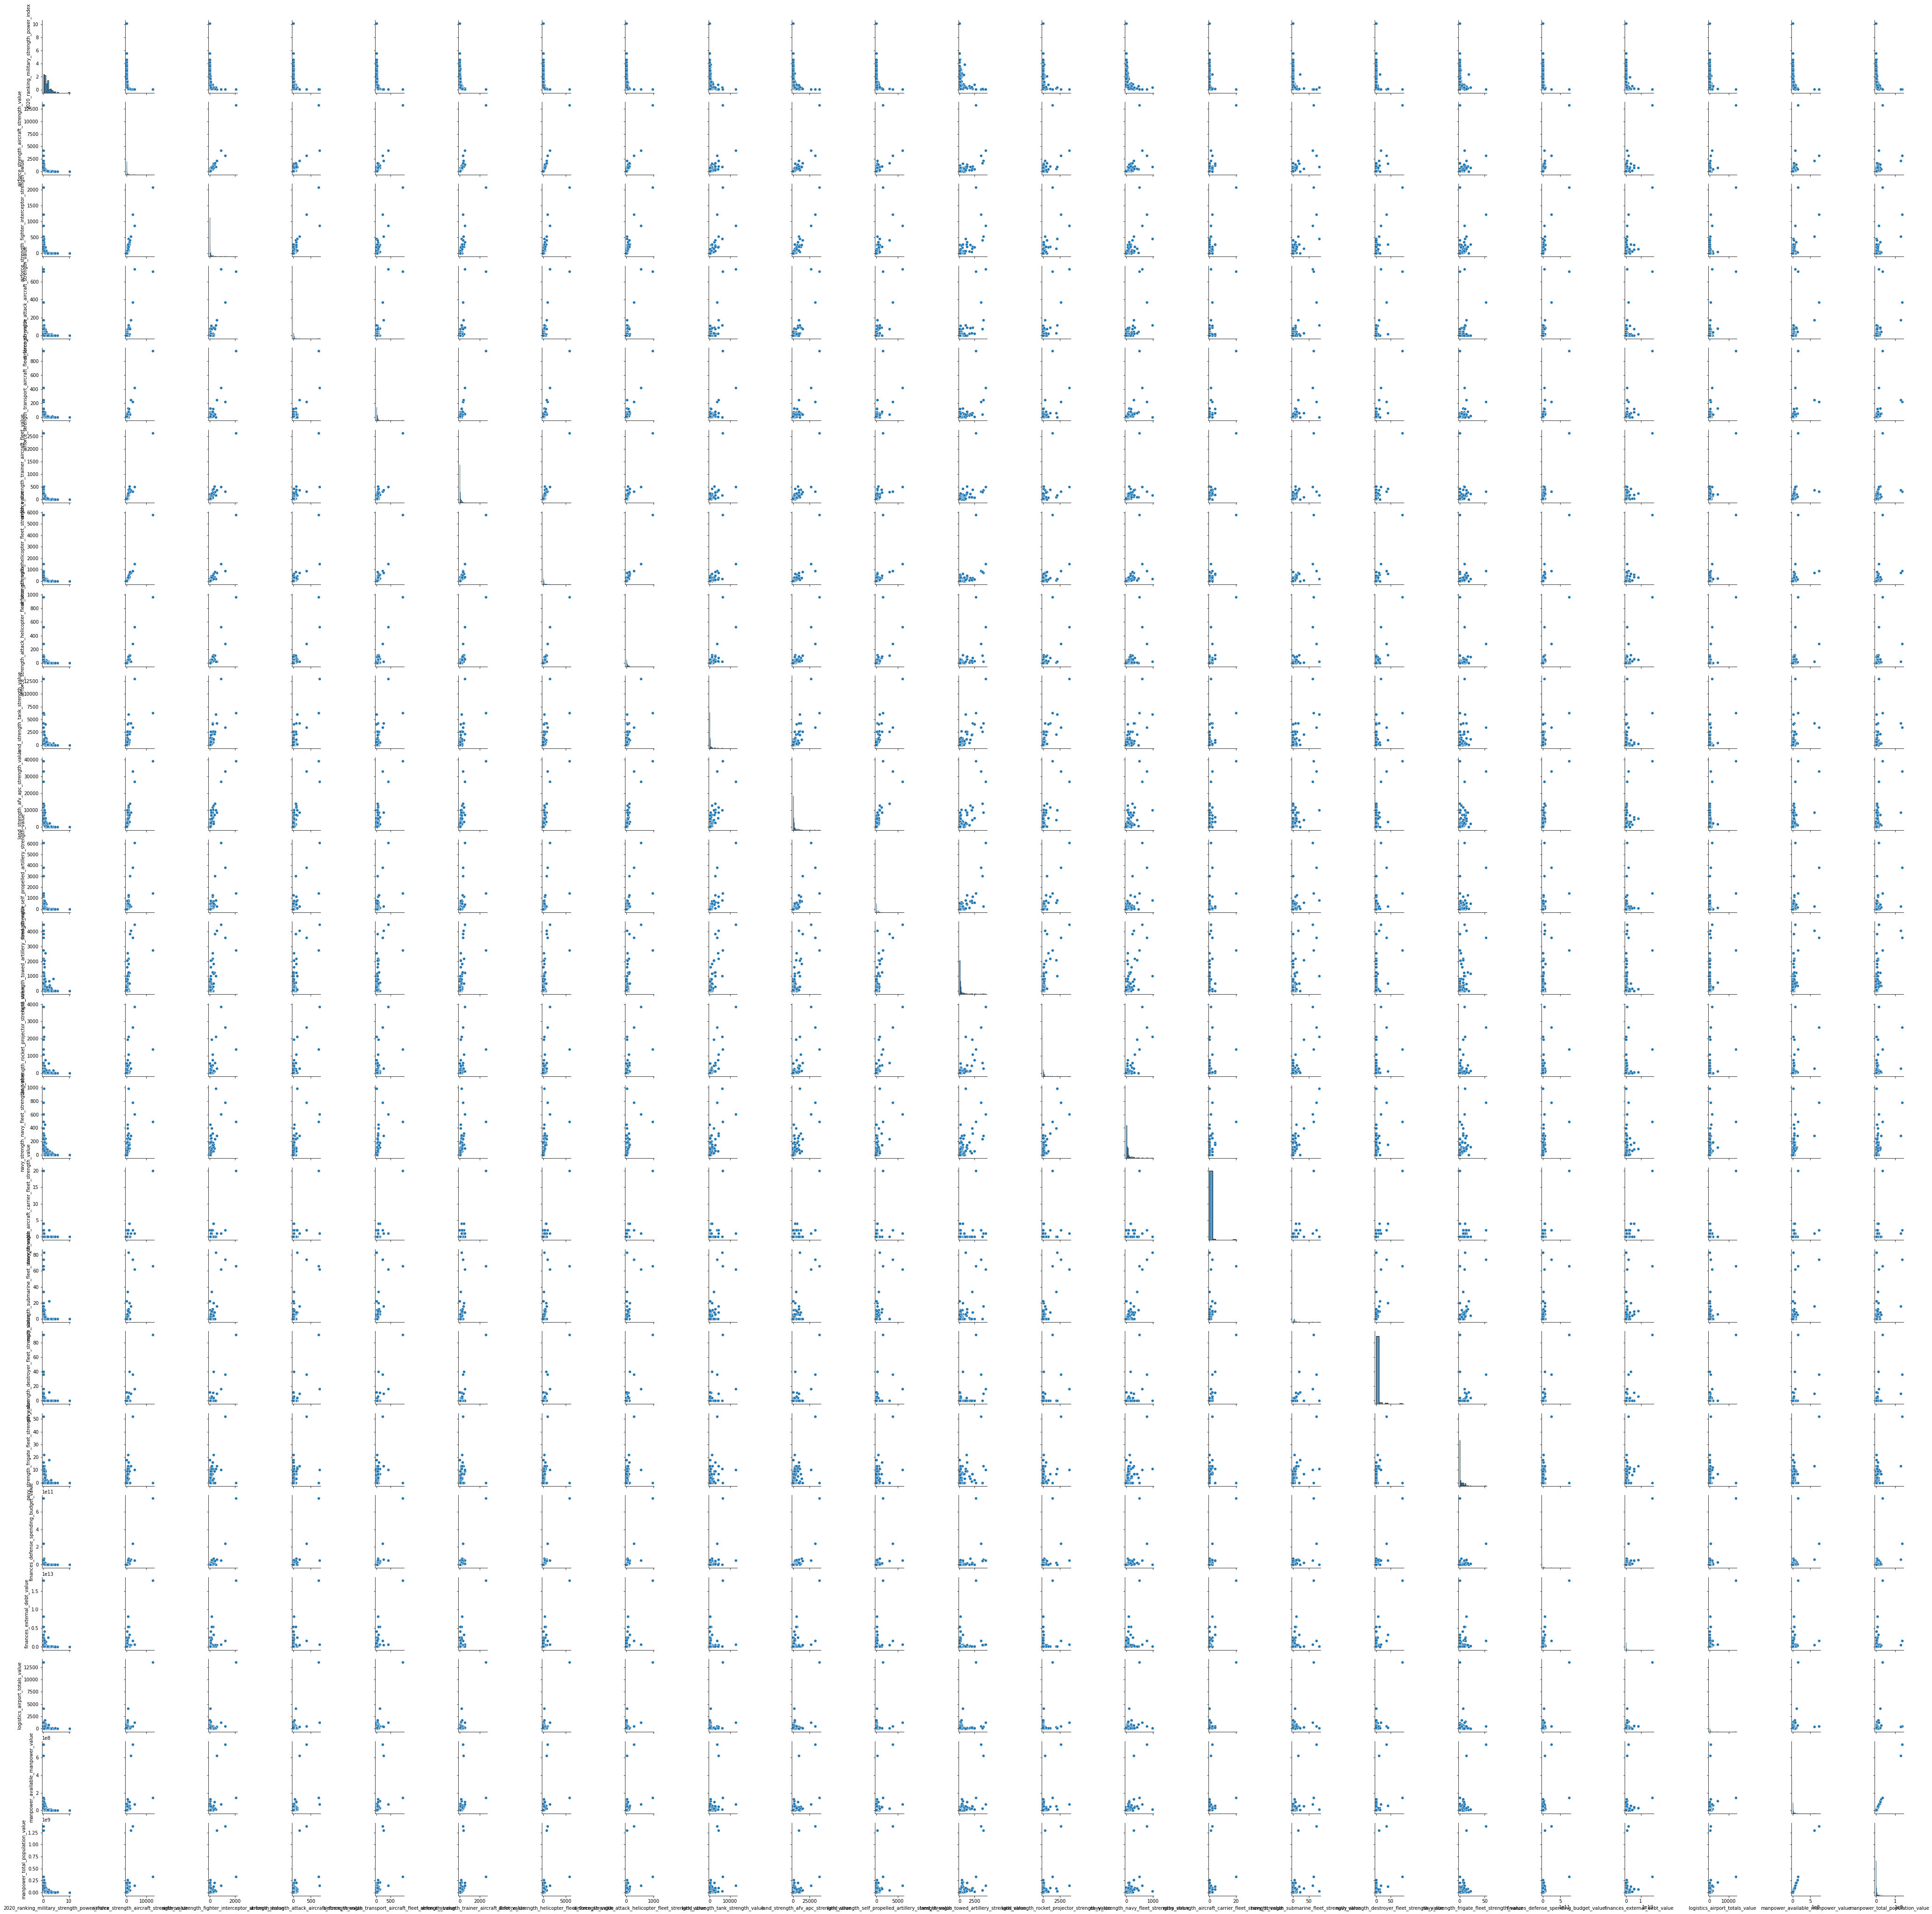

In [40]:
sns.pairplot(df)
plt.show()

<AxesSubplot:>

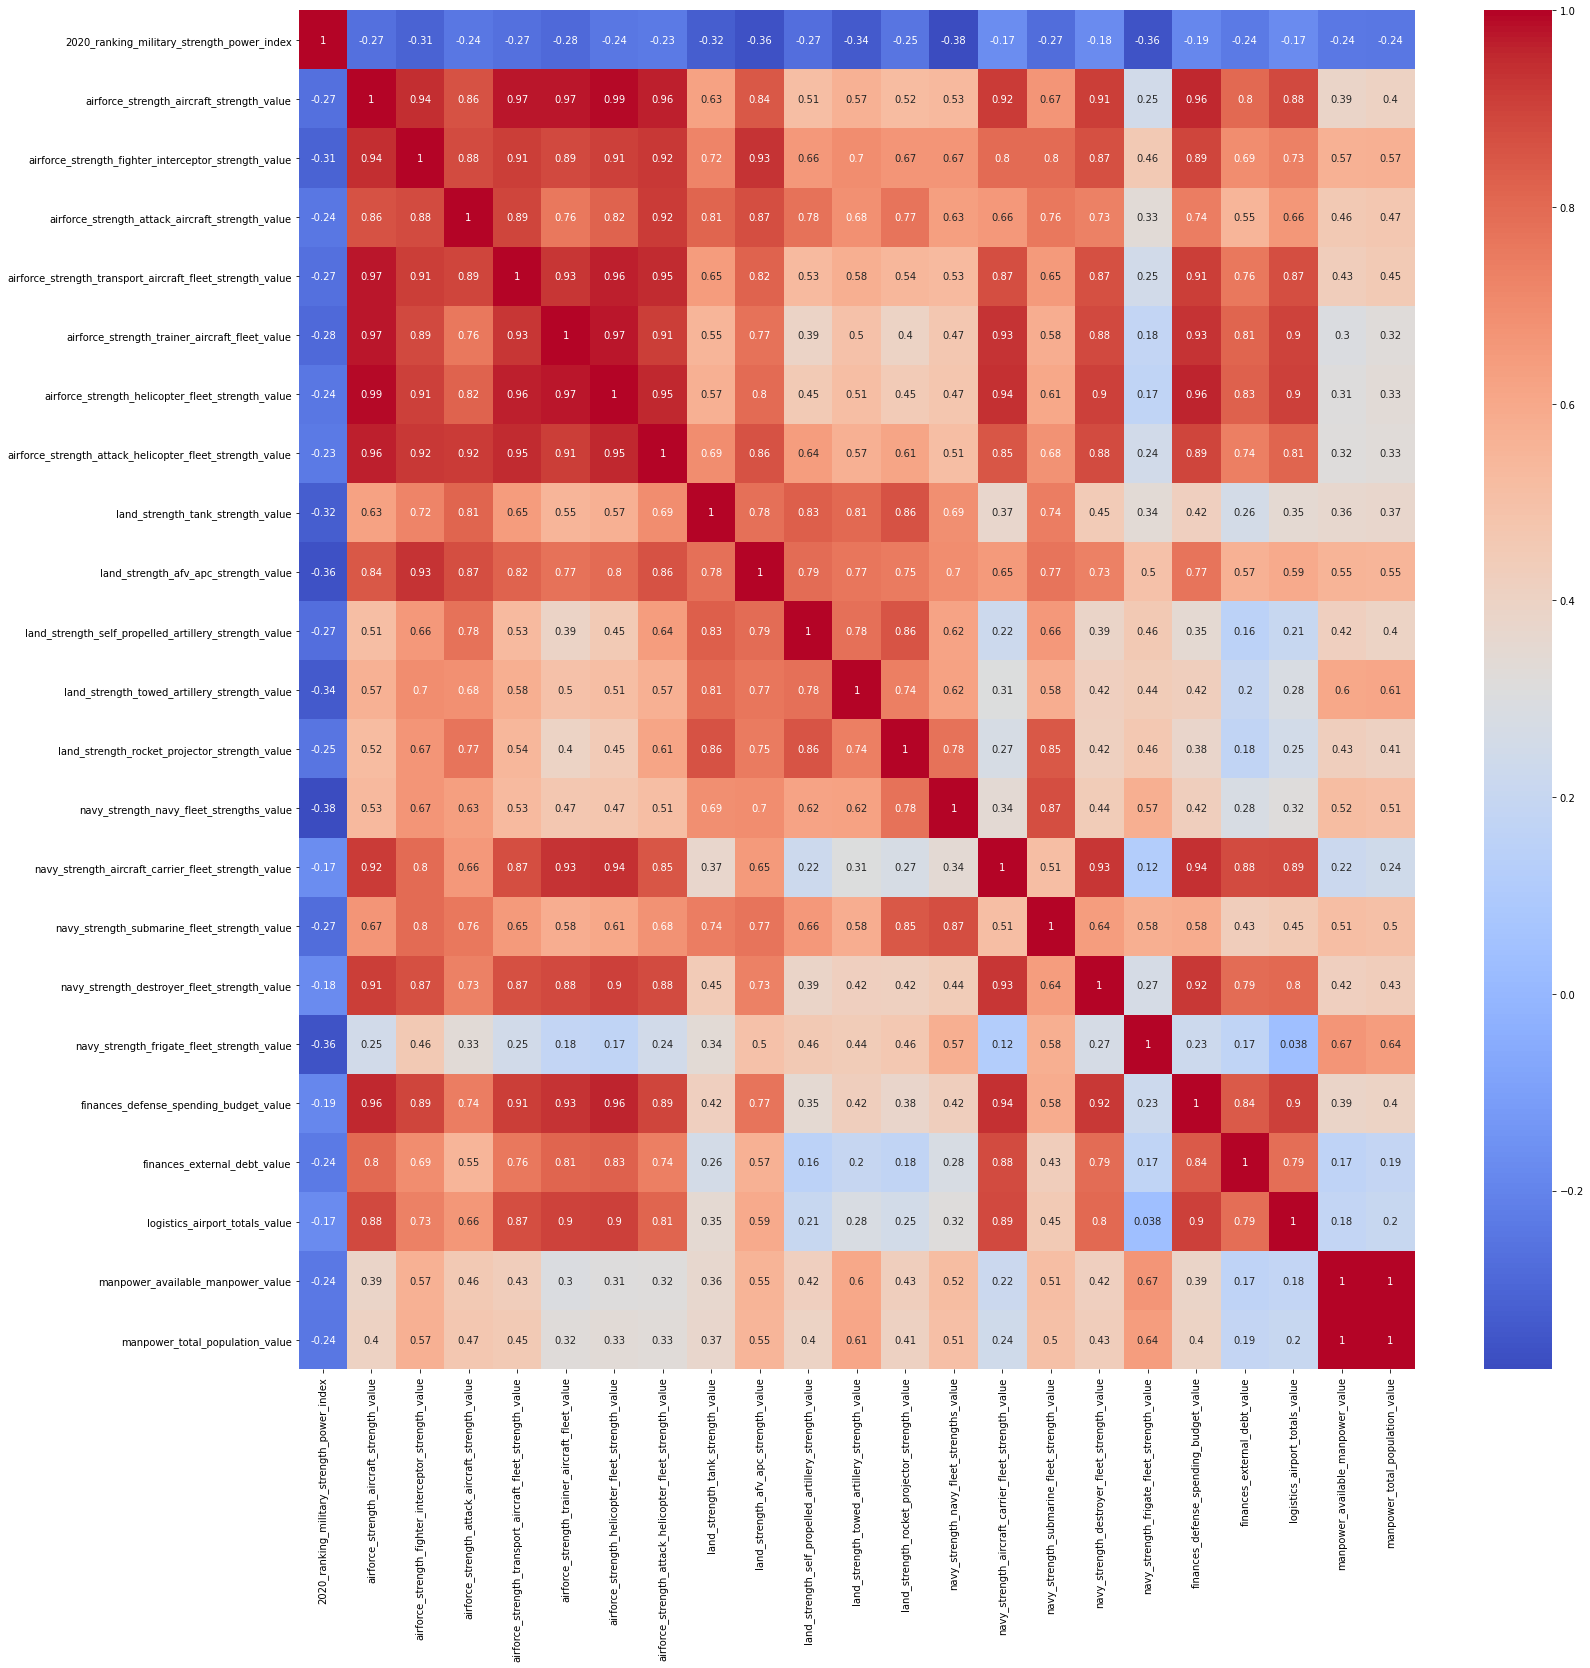

In [41]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True, cmap ="coolwarm")

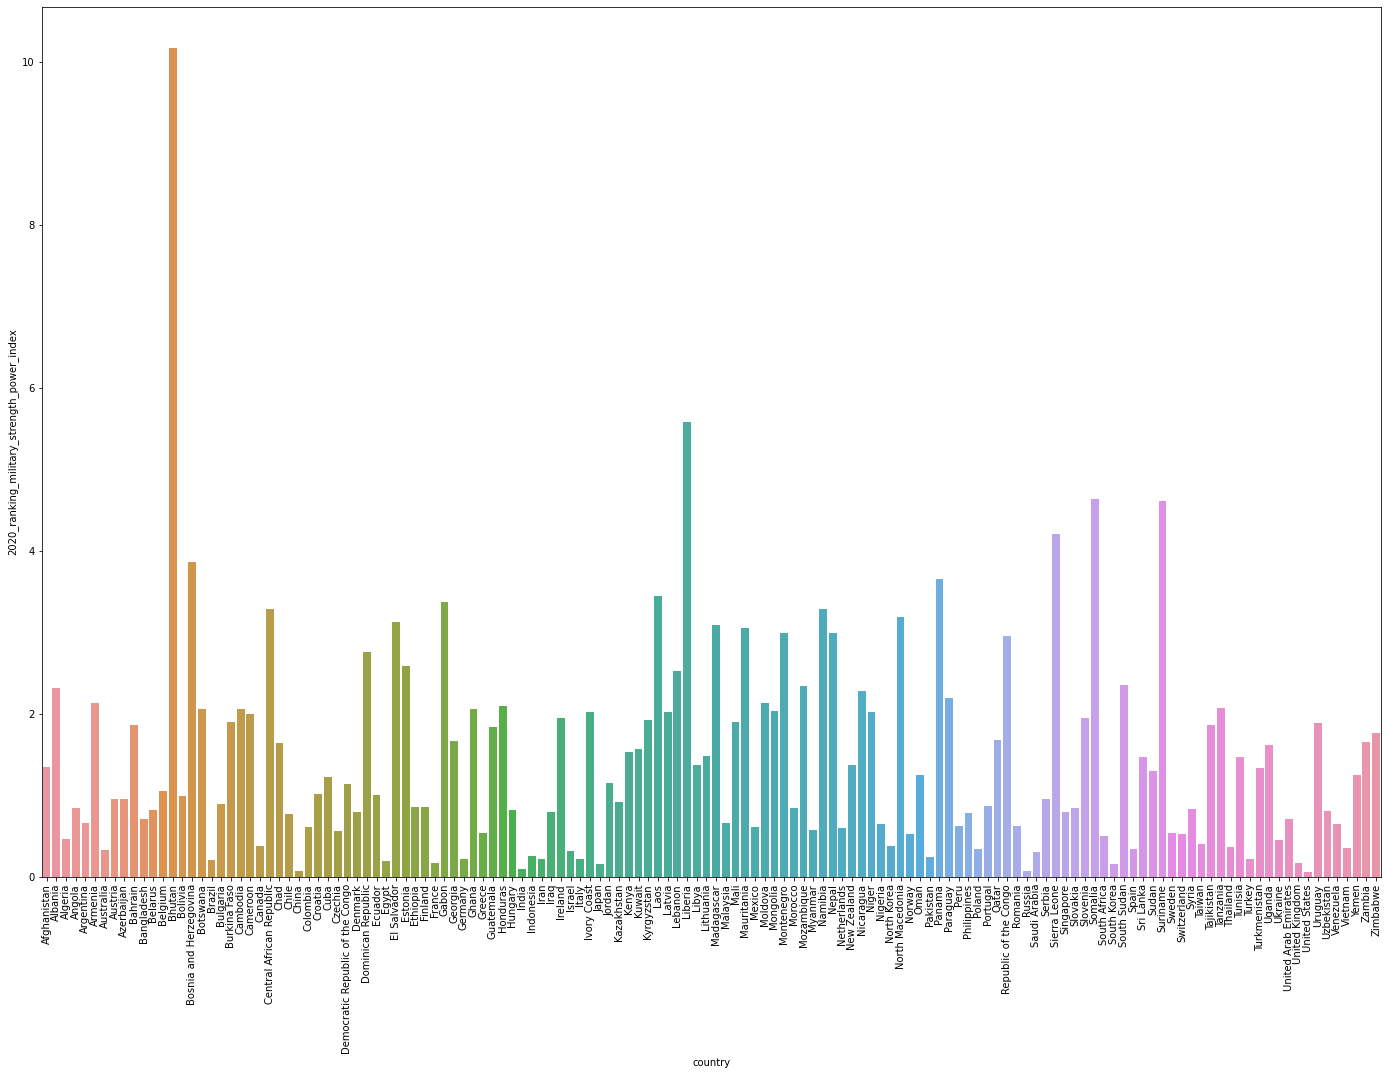

In [42]:
military_power = df['2020_ranking_military_strength_power_index'].sort_values()

plt.figure(figsize = (24,16))
sns.barplot(y = military_power, x = df.country)
plt.xticks(rotation = 90);


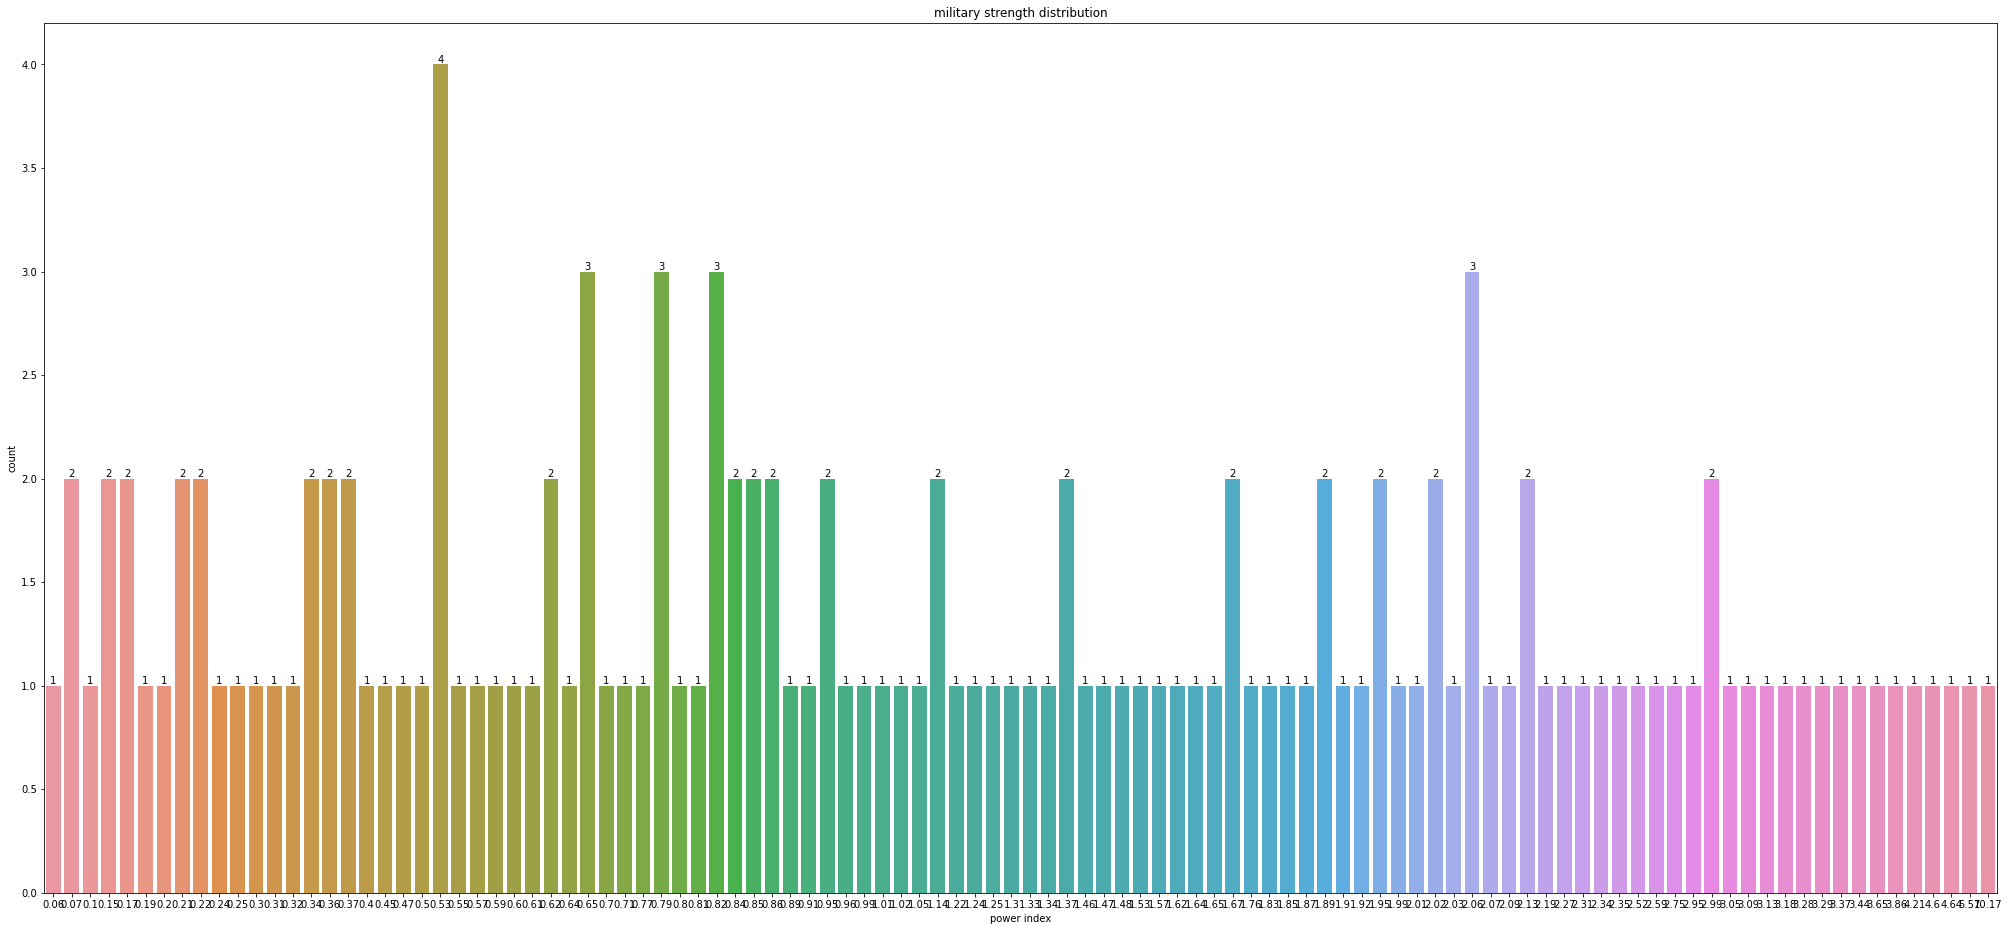

In [43]:
plt.figure(figsize=(35,16))
ax = sns.countplot(x =df['2020_ranking_military_strength_power_index'].round(2), data = df)
plt.title('military strength distribution')
plt.xlabel('power index')
ax.bar_label(ax.containers[0]);

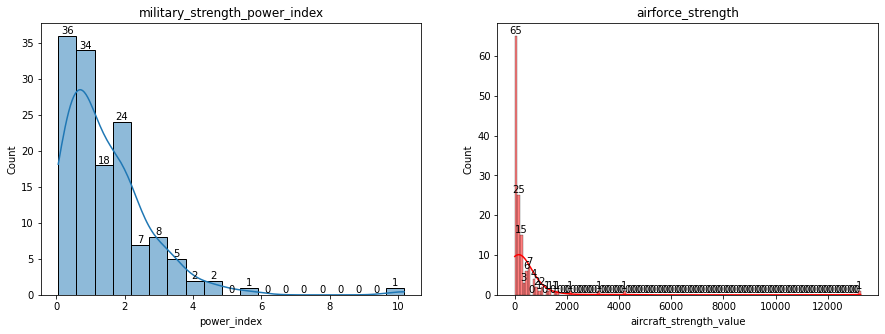

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.histplot(x='2020_ranking_military_strength_power_index', data=df, kde =True)
plt.title('military_strength_power_index')
plt.xlabel('power_index')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = sns.histplot(x ='airforce_strength_aircraft_strength_value', data=df, color='red', kde = True)
plt.title('airforce_strength')
plt.xlabel('aircraft_strength_value')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

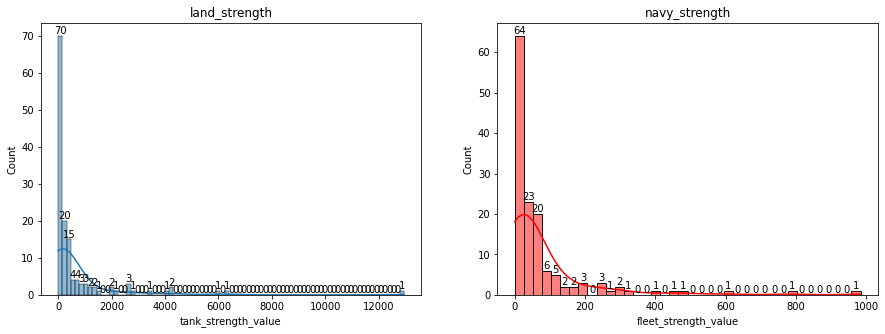

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.histplot(x='land_strength_tank_strength_value', data=df, kde =True)
plt.title('land_strength')
plt.xlabel('tank_strength_value')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = sns.histplot(x ='navy_strength_navy_fleet_strengths_value', data=df, color='red', kde = True)
plt.title('navy_strength')
plt.xlabel('fleet_strength_value')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

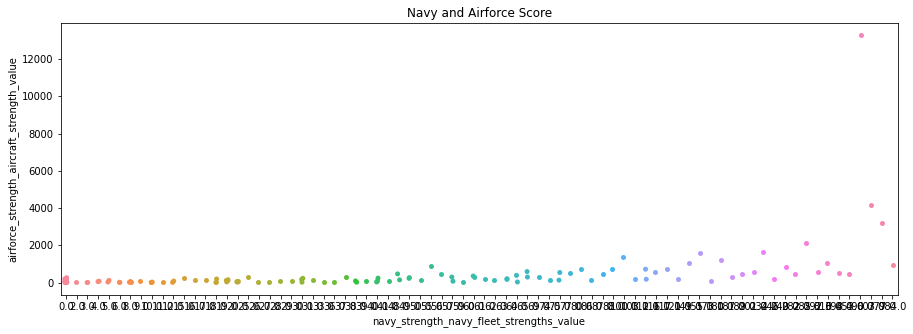

In [46]:
plt.figure(figsize=(15,5))
sns.stripplot(x='navy_strength_navy_fleet_strengths_value', y='airforce_strength_aircraft_strength_value', data=df)
plt.title('Navy and Airforce Score')
plt.show()


## Decriptive statistics

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
2020_ranking_military_strength_power_index,138.0,1.460716e+00,1.324018e+00,6.060000e-02,5.748000e-01,1.034100e+00,2.021525e+00,1.016810e+01
airforce_strength_aircraft_strength_value,138.0,3.884710e+02,1.231982e+03,0.000000e+00,3.300000e+01,1.110000e+02,2.902500e+02,1.326400e+04
airforce_strength_fighter_interceptor_strength_value,138.0,8.156522e+01,2.303248e+02,0.000000e+00,0.000000e+00,1.700000e+01,6.050000e+01,2.085000e+03
airforce_strength_attack_aircraft_strength_value,138.0,2.576087e+01,9.452822e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.575000e+01,7.420000e+02
airforce_strength_transport_aircraft_fleet_strength_value,138.0,3.023188e+01,9.233044e+01,0.000000e+00,3.000000e+00,9.000000e+00,2.600000e+01,9.450000e+02
airforce_strength_trainer_aircraft_fleet_value,138.0,8.283333e+01,2.408037e+02,0.000000e+00,4.250000e+00,2.600000e+01,7.925000e+01,2.643000e+03
airforce_strength_helicopter_fleet_strength_value,138.0,1.540652e+02,5.201836e+02,0.000000e+00,1.525000e+01,4.400000e+01,1.267500e+02,5.768000e+03
airforce_strength_attack_helicopter_fleet_strength_value,138.0,2.562319e+01,9.732609e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.775000e+01,9.670000e+02
land_strength_tank_strength_value,138.0,6.465652e+02,1.515464e+03,0.000000e+00,1.925000e+01,1.530000e+02,4.362500e+02,1.295000e+04
land_strength_afv_apc_strength_value,138.0,2.485696e+03,5.410546e+03,0.000000e+00,2.502500e+02,7.345000e+02,2.000000e+03,3.925300e+04


# Data Preprocessing

In [48]:
X = df.drop(["country"], axis=1)

# Modelling

In [49]:
from sklearn.preprocessing import RobustScaler

In [50]:
scaler = RobustScaler()
X = scaler.fit_transform(X)

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [51]:
from pyclustertend import hopkins

In [52]:
hopkins(X, X.shape[0])

0.06126334788245803

## Clustering with K-means

In [53]:
from sklearn.cluster import KMeans

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

Text(0.5, 1.0, 'elbow method')

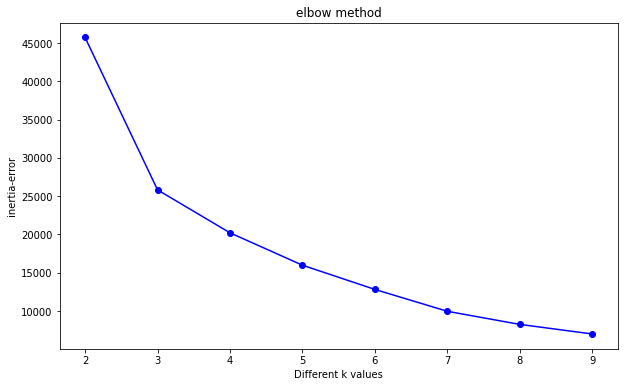

In [54]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

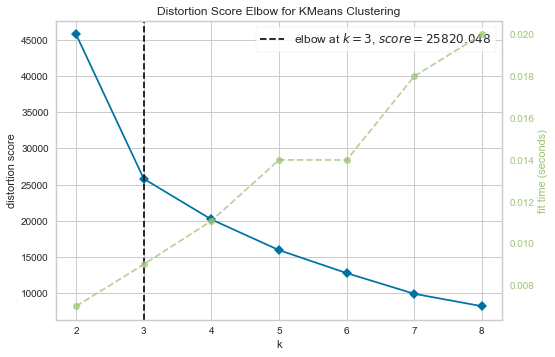

In [55]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)       
visualizer.show();

### Model Building and label visualisation

In [56]:
model = KMeans(n_clusters =4, random_state=42)   # with domain knowledege are n_clusters decided 
model.fit_predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 2])

In [57]:
model.labels_ 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 2])

In [58]:
df['cluster'] = model.labels_ 

In [59]:
df['cluster'].value_counts()

2    121
0     14
3      2
1      1
Name: cluster, dtype: int64

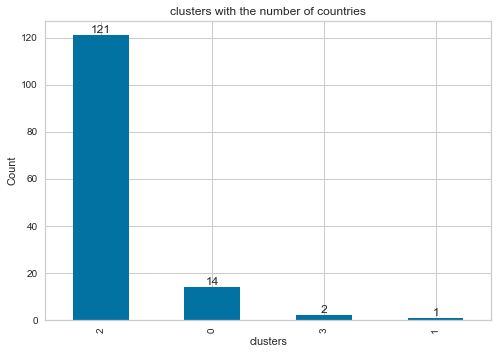

In [60]:
plt.title("clusters with the number of countries")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df['cluster'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [61]:
df[df['cluster'] == 0]['country']

17             Brazil
35              Egypt
40             France
43            Germany
49              India
51               Iran
55              Italy
57              Japan
82        Netherlands
87        North Korea
91           Pakistan
110       South Korea
124            Turkey
129    United Kingdom
Name: country, dtype: object

In [62]:
df[df['cluster'] == 1]['country']

130    United States
Name: country, dtype: object

In [63]:
df[df['cluster'] == 2]['country']  

0                           Afghanistan
1                               Albania
2                               Algeria
3                                Angola
4                             Argentina
5                               Armenia
6                             Australia
7                               Austria
8                            Azerbaijan
9                               Bahrain
10                           Bangladesh
11                              Belarus
12                              Belgium
13                               Bhutan
14                              Bolivia
15               Bosnia and Herzegovina
16                             Botswana
18                             Bulgaria
19                         Burkina Faso
20                             Cambodia
21                             Cameroon
22                               Canada
23             Central African Republic
24                                 Chad
25                                Chile


In [64]:
df[df['cluster'] == 3]['country']

26      China
101    Russia
Name: country, dtype: object

In [65]:
df["military_power"] = df['cluster'].map({0:"relative powerful", 1:"super power",2:"weak", 3: 'powerful'})

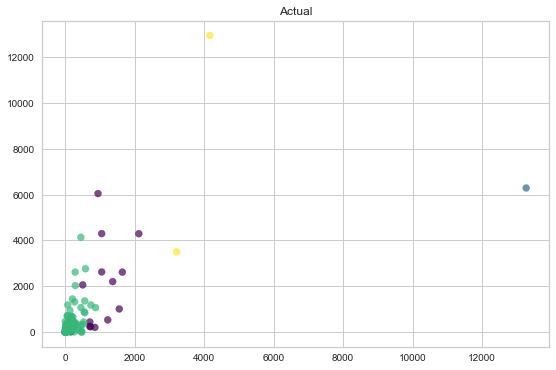

In [66]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(df["airforce_strength_aircraft_strength_value"], df["land_strength_tank_strength_value"], c = df['cluster'], cmap = "viridis", alpha=0.7)
plt.title("Actual");



<AxesSubplot:xlabel='airforce_strength_aircraft_strength_value', ylabel='land_strength_tank_strength_value'>

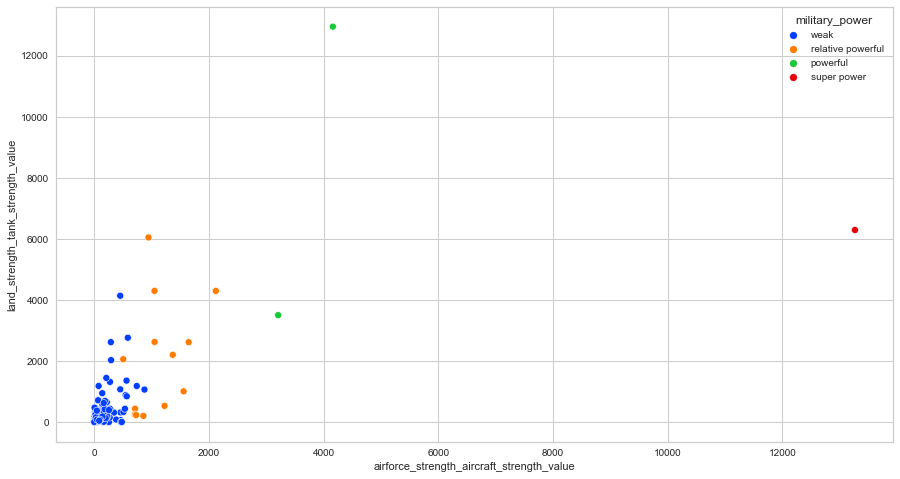

In [67]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='airforce_strength_aircraft_strength_value', y='land_strength_tank_strength_value', hue= df["military_power"], data=df, palette="bright")

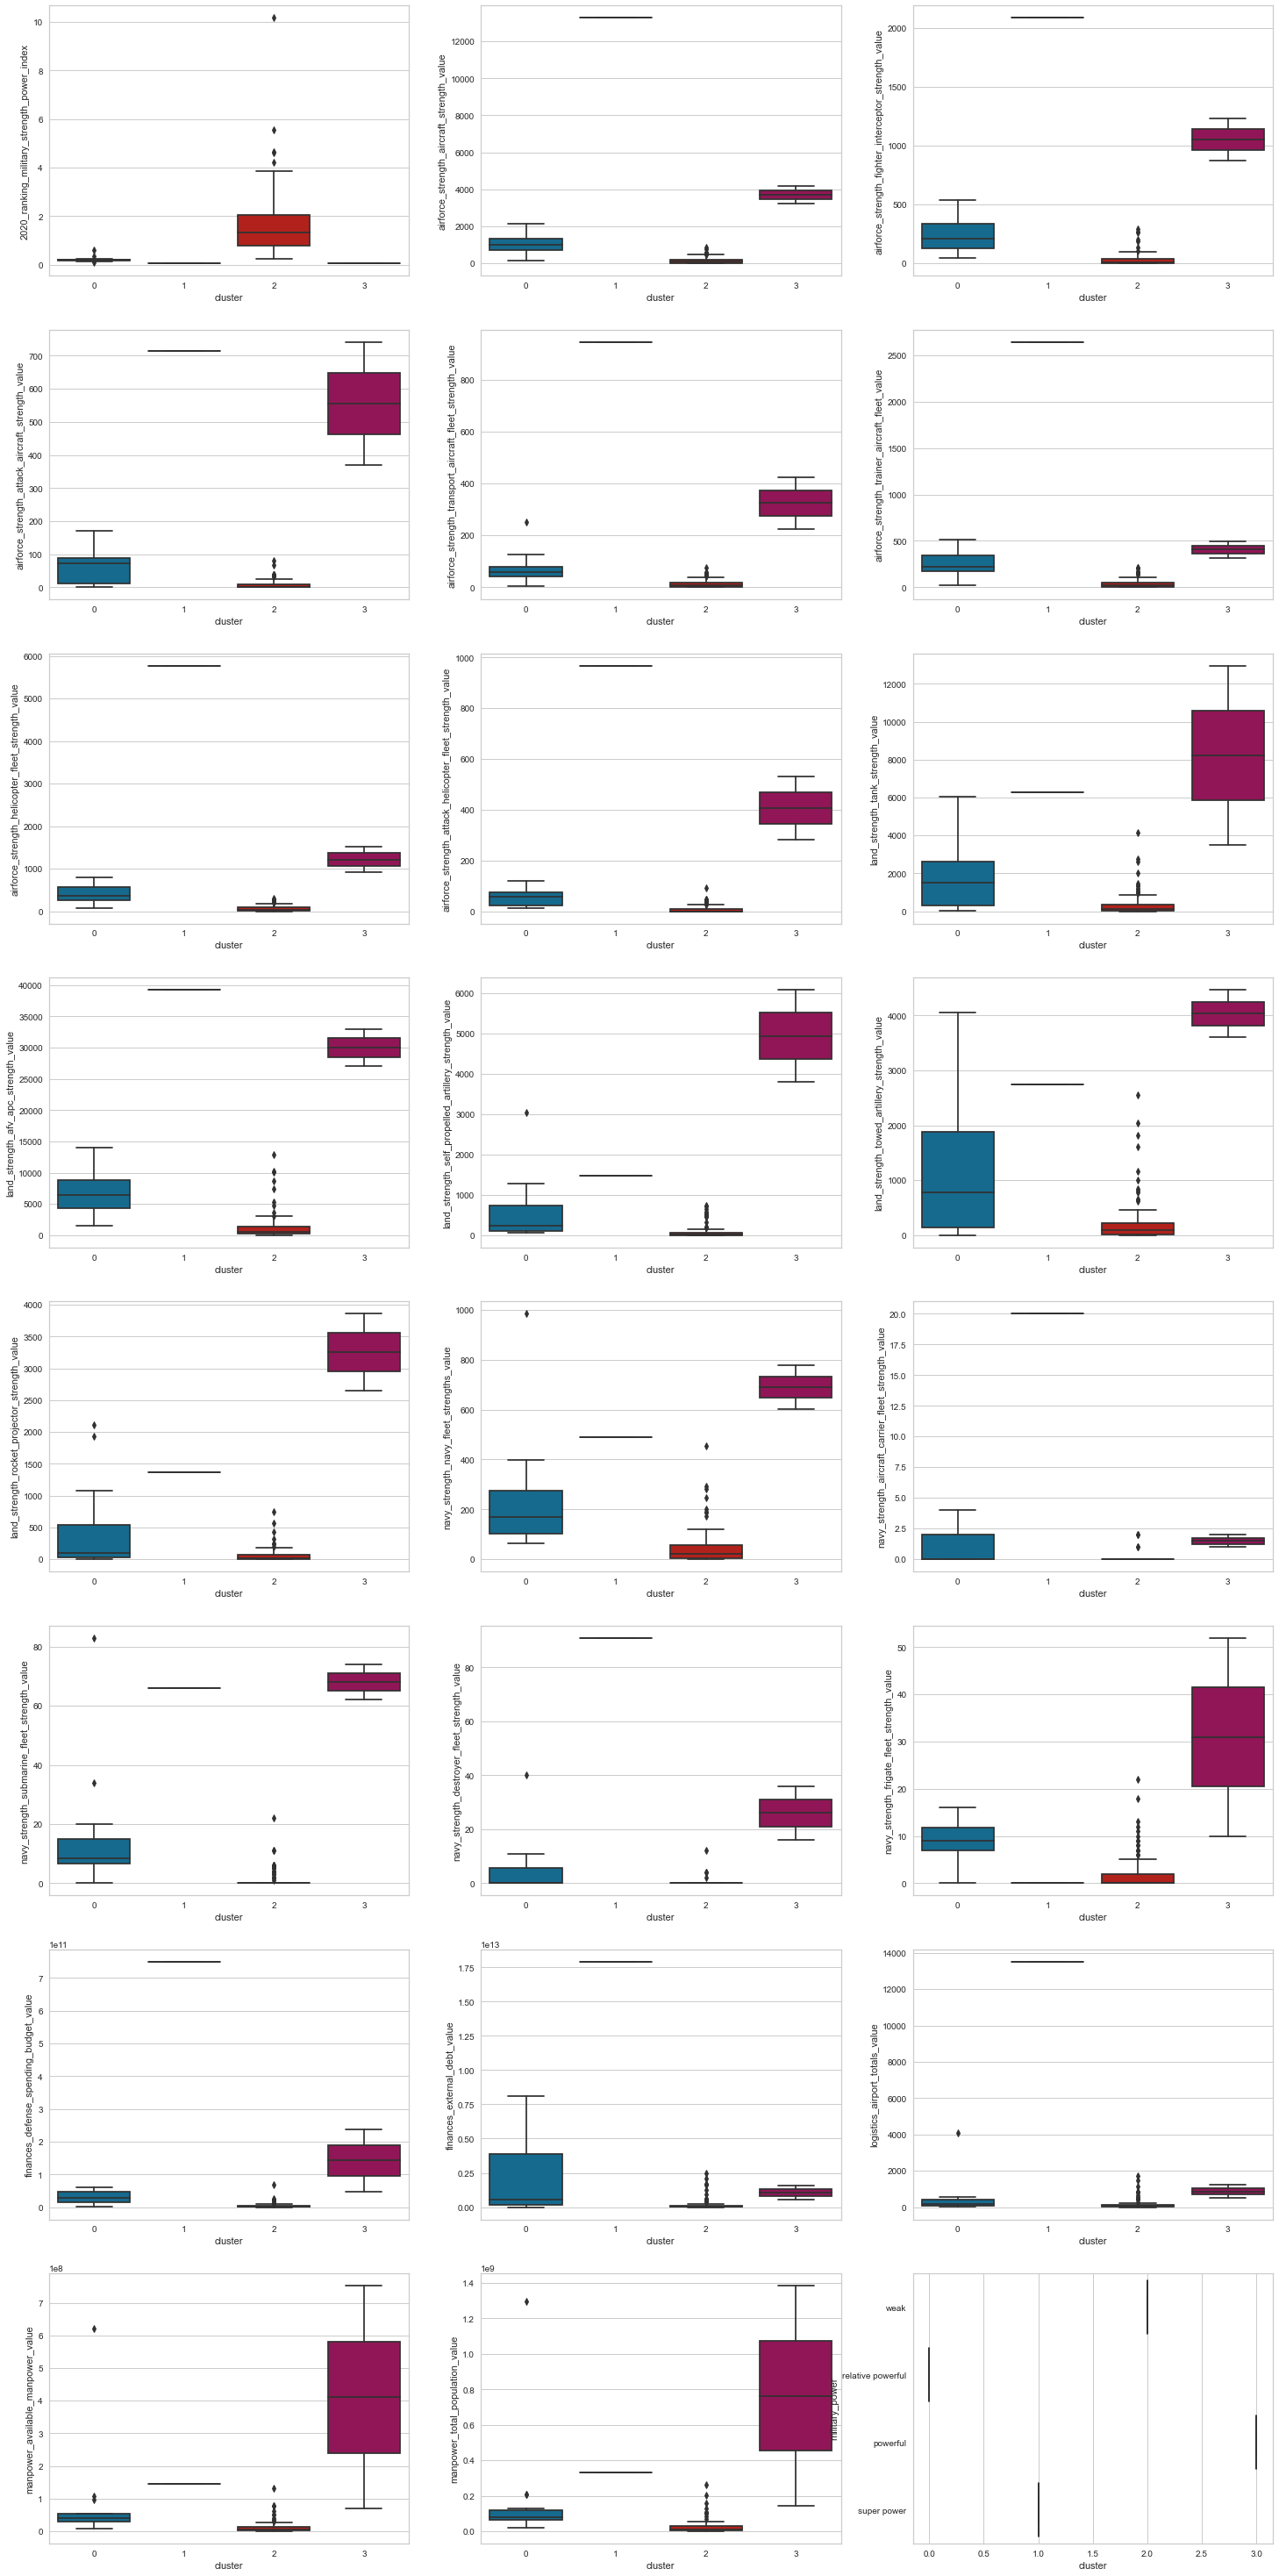

In [68]:
index = 0
plt.figure(figsize=(25, 60))

for feature in df.drop("country", axis=1):
    if feature != 'cluster':
        index += 1
        plt.subplot(9, 3, index)
        sns.boxplot(x="cluster", y=feature, data=df)

### Evaluate 

In [69]:
from sklearn.metrics import silhouette_score

In [70]:
silhouette_score(X, model.labels_)

0.6860898028903778

In [71]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.9297106783925652
For n_clusters=3, the silhouette score is 0.868072989180208
For n_clusters=4, the silhouette score is 0.6860898028903778
For n_clusters=5, the silhouette score is 0.6887369833694336
For n_clusters=6, the silhouette score is 0.6908066572510041
For n_clusters=7, the silhouette score is 0.6921093365558072
For n_clusters=8, the silhouette score is 0.6157488160022266


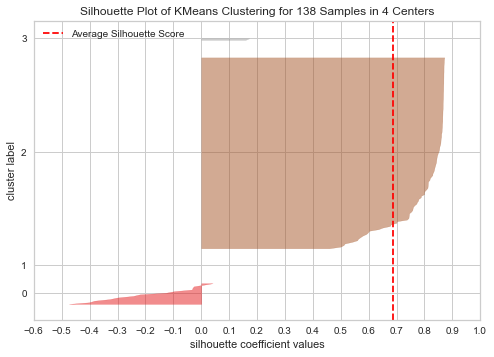

In [72]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42) 
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    
visualizer.poof();

## Hierarchical Clustering

In [73]:
from pyclustertend import hopkins

In [74]:
hopkins(X, X.shape[0])

0.05975994408120287

### Dendogram

In [75]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [76]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

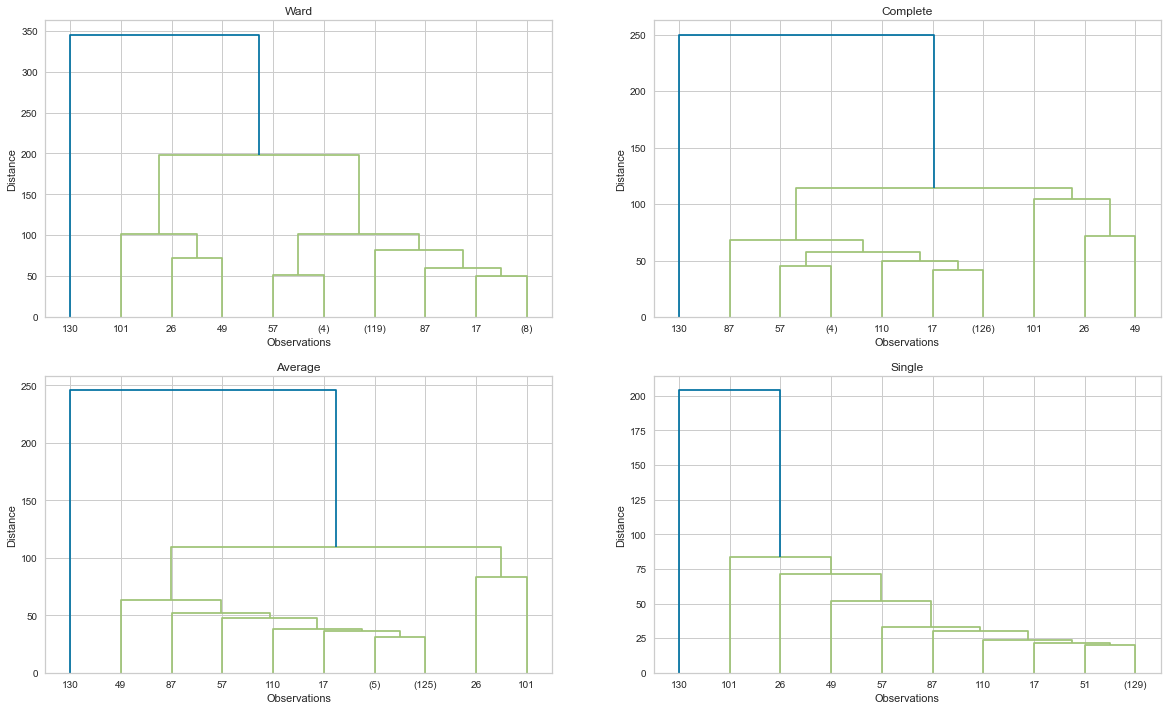

In [77]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

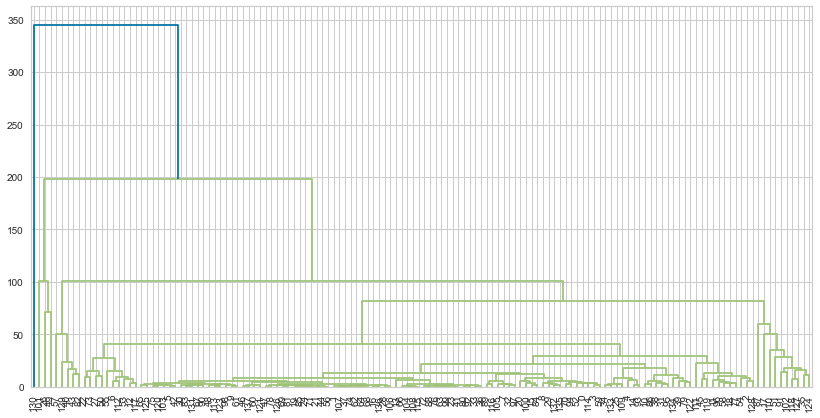

In [78]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

### Model Building and label visualisation

In [79]:
from sklearn.cluster import AgglomerativeClustering

In [80]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.9297106783925652
Silhouette Score for 3 clusters: 0.8505977766770586
Silhouette Score for 4 clusters: 0.7095099839609449
Silhouette Score for 5 clusters: 0.7088288270429458
Silhouette Score for 6 clusters: 0.6494874506298979
Silhouette Score for 7 clusters: 0.6496157152771004
Silhouette Score for 8 clusters: 0.6298247833827203
Silhouette Score for 9 clusters: 0.6320256182846585


In [81]:
model_h = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
y_agg = model_h.fit_predict(X)

In [82]:
df['cluster_Agg'] = y_agg
df.head()

,country,2020_ranking_military_strength_power_index,airforce_strength_aircraft_strength_value,airforce_strength_fighter_interceptor_strength_value,airforce_strength_attack_aircraft_strength_value,airforce_strength_transport_aircraft_fleet_strength_value,airforce_strength_trainer_aircraft_fleet_value,airforce_strength_helicopter_fleet_strength_value,airforce_strength_attack_helicopter_fleet_strength_value,land_strength_tank_strength_value,land_strength_afv_apc_strength_value,land_strength_self_propelled_artillery_strength_value,land_strength_towed_artillery_strength_value,land_strength_rocket_projector_strength_value,navy_strength_navy_fleet_strengths_value,navy_strength_aircraft_carrier_fleet_strength_value,navy_strength_submarine_fleet_strength_value,navy_strength_destroyer_fleet_strength_value,navy_strength_frigate_fleet_strength_value,finances_defense_spending_budget_value,finances_external_debt_value,logistics_airport_totals_value,manpower_available_manpower_value,manpower_total_population_value,cluster,military_power,cluster_Agg
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,14325743.0,34940837.0,2,weak,2
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,1519438.0,3057220.0,2,weak,2
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,20741263.0,41657488.0,2,weak,2
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,6244205.0,30355880.0,2,weak,2
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,20179430.0,44694198.0,2,weak,2


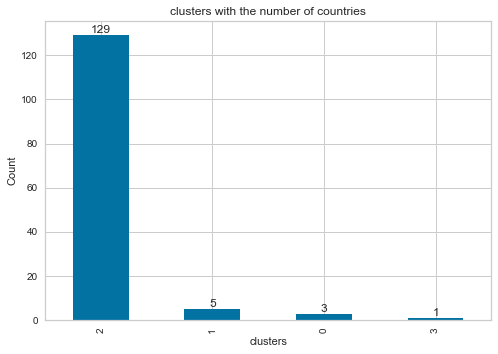

In [83]:
plt.title("clusters with the number of countries")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df['cluster_Agg'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [84]:
df[df['cluster_Agg'] == 0]['country']

26      China
49      India
101    Russia
Name: country, dtype: object

In [85]:
df[df['cluster_Agg'] == 1]['country']

40             France
43            Germany
57              Japan
82        Netherlands
129    United Kingdom
Name: country, dtype: object

In [86]:
df[df['cluster_Agg'] == 2]['country']

0                           Afghanistan
1                               Albania
2                               Algeria
3                                Angola
4                             Argentina
5                               Armenia
6                             Australia
7                               Austria
8                            Azerbaijan
9                               Bahrain
10                           Bangladesh
11                              Belarus
12                              Belgium
13                               Bhutan
14                              Bolivia
15               Bosnia and Herzegovina
16                             Botswana
17                               Brazil
18                             Bulgaria
19                         Burkina Faso
20                             Cambodia
21                             Cameroon
22                               Canada
23             Central African Republic
24                                 Chad


In [87]:
df[df['cluster_Agg'] == 3]['country']

130    United States
Name: country, dtype: object

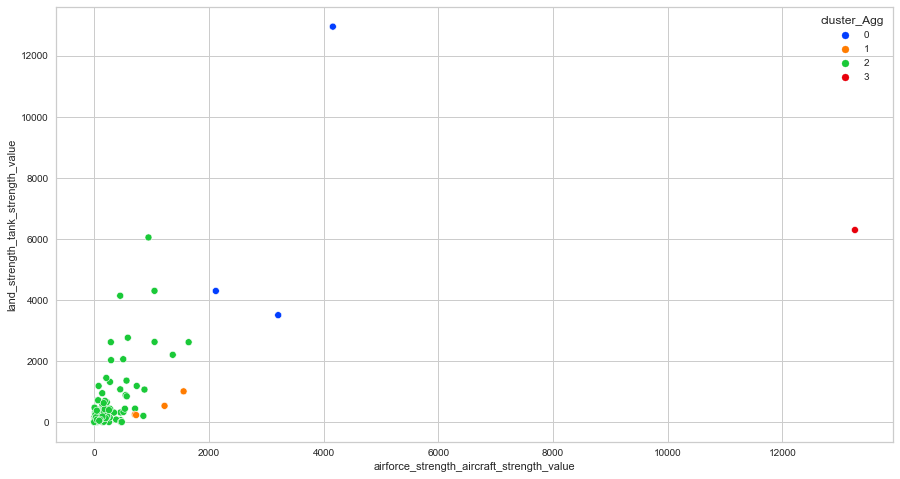

In [88]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='airforce_strength_aircraft_strength_value', y='land_strength_tank_strength_value', hue= df['cluster_Agg'], data=df, palette="bright");

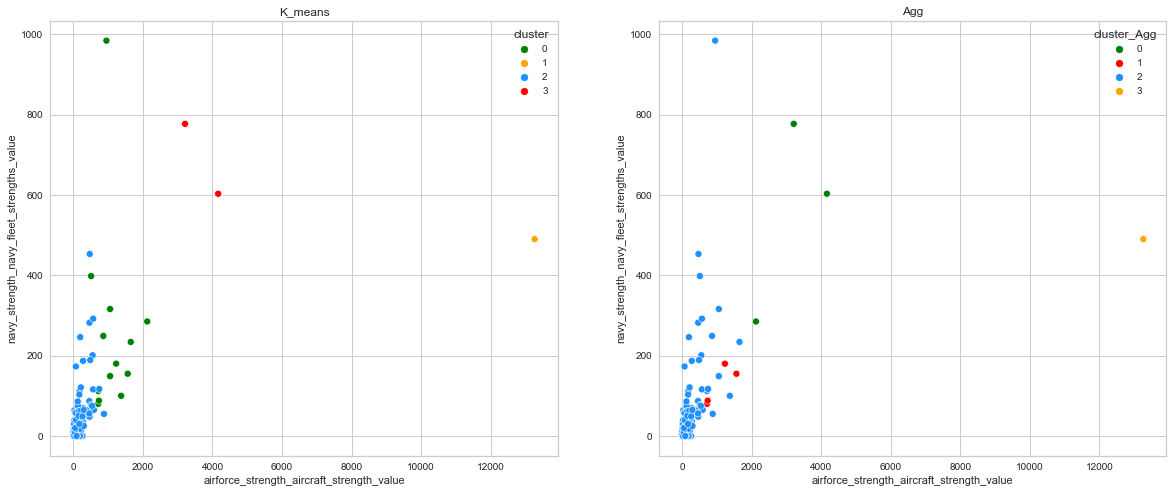

In [89]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='airforce_strength_aircraft_strength_value', y='navy_strength_navy_fleet_strengths_value', hue=df['cluster'], data=df, palette=['green', 'orange',
                                                            'dodgerblue','red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='airforce_strength_aircraft_strength_value', y='navy_strength_navy_fleet_strengths_value', hue=df['cluster_Agg'], data=df, palette=['green',
                                                            'red','dodgerblue','orange'])
plt.title("Agg");

### Evaluate 

In [90]:
silhouette_score(X, model_h.labels_)

0.7095099839609449